# **Projet UA 3 – Implication de l'IA dans le processus de diagnostic d'une cellule cancereuse**:


## **Introduction**:

### **Informations Complémentaires**



Les caractéristiques sont calculées à partir d'une image numérisée d'un prélèvement par aspiration à l'aiguille fine (PAAF) d'une masse mammaire. Elles décrivent les caractéristiques des noyaux cellulaires présents dans l'image. Quelques images sont disponibles à l'adresse http://www.cs.wisc.edu/~street/images/. Le plan de séparation décrit précédemment a été obtenu par la méthode MSM-T (Multisurface Method-Tree) [KP Bennett, « Decision Tree Construction Via Linear Programming », Actes du 4e congrès de la Midwest Artificial Intelligence and Cognitive Science Society, p. 97-101, 1992], une méthode de classification qui utilise la programmation linéaire pour construire un arbre de décision. Les caractéristiques pertinentes ont été sélectionnées par une recherche exhaustive dans l'espace de 1 à 4 caractéristiques et 1 à 3 plans de séparation. Le programme linéaire utilisé pour obtenir le plan de séparation dans l'espace tridimensionnel est celui décrit dans : [KP Bennett et OL Mangasarian : « Robust Linear Programming Discrimination of Two Linearly Inseparable Sets », Optimization Methods and Software 1, 1992, 23-34]. Cette base de données est également accessible via le serveur FTP du département d'informatique de l'Université de Washington : ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

--------------------------------------------------------------------------------
En résumé
--------------------------------------------------------------------------------
Au lieu d'utiliser les modèles à base des CNN pour prédire notre cible, des algorithmes ont déjà été utilisé pour traduire les informations sur les images sous forme de données tabulaires. 


### **Description des données**


## Description des variables du dataset *Breast Cancer Wisconsin (Diagnostic)

### 1. Informations générales
- **ID number** : Identifiant unique de l’échantillon.  
- **Diagnosis** : Type de tumeur — **M** (*malignant*, maligne) ou **B** (*benign*, bénigne).



### 2. Caractéristiques cellulaires 

Chaque cellule est décrite à partir de **10 caractéristiques principales** calculées sur l’image numérique du noyau :


**radius** Moyenne des distances du centre au contour (taille globale) 

 **texture** ⁉ Écart-type des niveaux de gris (variation d’intensité)
 
**perimeter** : Longueur du contour cellulaire |

**area** : Surface de la cellule |

**smoothness** : Variation locale du rayon (régularité du contour) |

**compactness** : Degré de compacité *(perimeter² / area - 1)* |

**concavity** : Importance des creux dans le contour |

**concave points** : Nombre de creux (zones concaves) sur le contour |

**symmetry** : Symétrie du noyau |

**fractal dimension** : Complexité du contour (rugosité / forme irrégulière) 



### 3. Trois types de mesures pour chaque caractéristique

Chaque variable ci-dessus est mesurée selon **trois versions** :
- `*_mean` → **Valeur moyenne** sur l’image (ex. `radius_mean`)
- `*_se` → **Erreur standard** ou variation locale (ex. `radius_se`)
- `*_worst` → **Valeur maximale** observée (ex. `radius_worst`)

Ainsi, le dataset contient **10 caractéristiques × 3 mesures = 30 variables**,  
auxquelles s’ajoutent :
- `ID number`
- `Diagnosis`

 **Total : 32 colonnes.**



### Remarque
Les caractéristiques géométriques (*radius, perimeter, area, etc.*) permettent de distinguer les tumeurs bénignes (formes plus régulières et homogènes) des tumeurs malignes (formes irrégulières et plus complexes).




Historique à prendre en compte pour la présentation du projet

1. Comment les données ont été obtenues (imagerie médicale, PAAF, etc.)

    1. Prélèvement du tissu du sein (biopsie)

Lorsqu’une masse suspecte est détectée, un médecin réalise une biopsie :
 un petit échantillon de tissu du sein est prélevé.

Cet échantillon contient des cellules, certaines normales (bénignes) et parfois cancéreuses (malignes).

2. Observation des cellules au microscope

Les cellules prélevées sont ensuite :
-colorées pour bien voir leur forme
- placées sous un microscope numérique
- photographiées avec une caméra haute résolution

Ces images sont la base du dataset.

3. Extraction automatique de caractéristiques (feature extraction)

Un logiciel spécialisé analyse l’image pour mesurer la forme, la structure et la texture des noyaux cellulaires.
Ce sont les fameux attributs du dataset.

Les principales catégories de mesures sont :

*Forme

radius (rayon)

perimeter

area

compactness

concavity

* Texture

texture (variation d’intensité sur l’image)

smoothness (régularité du contour)

* Symétrie et régularité

symmetry

fractal_dimension

concave_points

4. Calcul des 3 versions : mean, se, worst

Pour chaque image, le logiciel analyse plusieurs cellules, pas juste une.
Et il en extrait trois valeurs pour chaque type de mesure :

A mean — moyenne

→ “À quoi ressemblent les cellules en général ?”

B se — erreur standard (standard error) ou variabilité locale (std/sqrt(n) avec n = nombre de cellules)

→ “À quel point les cellules sont-elles différentes les unes des autres ?”

C worst — valeurs les plus extrêmes

→ “Quelles sont les cellules les plus irrégulières ou suspectes ?”

Les tumeurs malignes ont souvent :

des cellules plus grandes

des contours irréguliers

une variabilité élevée

D'où l’importance de ces 3 niveaux.

5. Annotation de la tumeur : B (benign) ou M (malignant)

Finalement, un médecin spécialiste (pathologiste) vérifie la biopsie et attribue la classe cible :

M (Malignant) → tumeur cancéreuse

B (Benign) → tumeur non cancéreuse

Ensuite, cette variable est encodée (ex : B=0, M=1).

 6. Création du dataset final

On rassemble toutes ces informations dans un tableau :

radius_mean	radius_se	radius_worst	…	diagnosis
14.2	0.5	16.3	…	M
8.5	0.2	10.1	…	B

 Chaque ligne = une patiente
Chaque colonne = une caractéristique de l’image




# objectives de la prédiction 


1. Ce que détermine le dataset :
Ce n’est pas pour savoir s’il y a un cancer dans le corps.
 C’est pour déterminer si une tumeur déjà détectée est :
 Bénigne (non cancéreuse)

ou

Maligne (cancéreuse)

Donc :
Oui, c’est de la détection de cancer du sein, mais sur une tumeur déjà observée en imagerie ou palpée par un médecin.

 2. Pourquoi analyser les cellules ?

Quand une tumeur est trouvée, une biopsie est faite pour analyser les cellules au microscope.

Ce dataset utilise l’image du noyau cellulaire pour prédire si la tumeur est :

bénigne → cellules régulières, rondes, stables

maligne → cellules agressives, irrégulières, déformées

Le but du modèle est donc :
“Dire automatiquement si une tumeur du sein est cancéreuse ou non, à partir de l’image de ses cellules.”

3. Si le diagnostic est BENIN (B)

→ Pas de cancer
→ Pas de propagation
→ Souvent on surveille seulement, aucun traitement lourd
→ La tumeur peut rester ou être retirée si elle gêne

4. Si le diagnostic est MALIN (M)
là oui, c'est officiellement un cancer du sein

Une tumeur maligne peut se multiplier, envahir les tissus autour, et se propager dans l’organisme (métastases).

C’est pour ça que la suite est très importante.

5. Prochaine étape quand une tumeur est maligne

Une fois que la biopsie confirme que la tumeur est cancéreuse, le processus médical commence :

Étape 1 – Déterminer le stade du cancer (staging)

Le médecin mesure :

la taille de la tumeur

si elle touche les ganglions

si elle s’est propagée (métastases)

Étape 2 – Bilan complet

Exemples d’examens :

IRM du sein

mammographie

échographie

prise de sang

parfois scanner ou PET-scan

Étape 3 – Choix du traitement

Selon le stade, on peut avoir :

- Chirurgie

Enlever la tumeur (tumorectomie) ou parfois le sein (mastectomie)

- Radiothérapie

Détruire les cellules cancéreuses restantes

- Chimiothérapie

Traitement pour réduire ou éliminer la tumeur

- Hormonothérapie

Si la tumeur réagit aux hormones

- Immunothérapie

Stimuler le système immunitaire pour attaquer les cellules cancéreuses




# une tumeur c'est quoi ? 


1. Une tumeur n’est pas “une seule cellule”

Une tumeur est en réalité :

 un amas (une multiplication) de cellules anormales

qui se divisent trop rapidement et ne respectent plus le fonctionnement normal du tissu.

Donc :

- Une cellule devient anormale

- Elle perd son contrôle de croissance

- Elle commence à se multiplier

- Ces cellules s’accumulent

- L’ensemble forme une tumeur

2. Une cellule anormale → tumeur

Une tumeur commence toujours par une seule cellule qui a muté.
Cette cellule :

ignore les signaux pour arrêter de se diviser

se divise beaucoup plus vite que normal

transmet sa mutation aux cellules filles

Au bout d’un moment, on obtient une masse → la tumeur.

 3. Deux types de tumeurs
 Bénigne

→ cellules un peu anormales mais non agressives
→ elles restent localisées
→ elles ne détruisent pas les tissus autour
→ elles ne se propagent pas dans le corps

 Maligne (cancer)

→ cellules très anormales et agressives
→ elles envahissent les tissus voisins
→ elles peuvent migrer dans le sang ou la lymphe
→ métastases possibles

 4. Ce que le dataset mesure : les cellules qui composent la tumeur

Chaque variable (radius_mean, smoothness_se, compactness_worst, etc.) décrit :

la taille des cellules

leur forme

leur irrégularité

leur densité

leur symétrie

Le but est de voir si les cellules dans l’amas (la tumeur) ressemblent plus à :

des cellules normales / régulières → bénigne

des cellules déformées / agressives → maligne

Donc oui, la tumeur vient d’une cellule, mais ce que l’on analyse dans la réalité (et dans ton dataset) ce sont :

 les caractéristiques des cellules qui composent l’amas tumoral.

Contexte du dataset

Le jeu de données Breast Cancer Wisconsin Diagnostic (ID=17 sur UCI) provient de photographies de cellules épithéliales du sein obtenues par aspiration à l’aiguille fine (FNA).

Chaque ligne du dataset correspond à un échantillon (un prélèvement d’une patiente).

Pour chaque échantillon, on prend une image microscopique.

Sur cette image, on identifie plusieurs cellules et on mesure différentes caractéristiques morphologiques (forme, texture, etc.).

D’où viennent les 30 variables ?

Sur chaque image, on mesure 10 caractéristiques de base des cellules :

radius

texture

perimeter

area

smoothness

compactness

concavity

concave points

symmetry

fractal dimension


pour chaque caractéristique, on calcule trois versions :

Suffixe	Signification	Interprétation
_mean	Moyenne des valeurs mesurées sur toutes les cellules de l’image	donne une idée générale de la forme des cellules
_se	Erreur standard (ou écart-type local)	mesure la variabilité des cellules dans l’échantillon
_worst	Valeur maximale observée parmi les cellules	mesure la cellule la plus anormale du groupe
Donc, pour répondre à ta question :

Est-ce qu’il y a plusieurs photos de cellule, ou bien plusieurs cellules sur une seule photo ?

C’est une seule photo par échantillon,
mais plusieurs cellules sont visibles dessus.

Chaque ligne du dataset représente :

→ une patiente
→ un échantillon de tissu (une photo microscopique)
→ et des statistiques calculées sur plusieurs cellules visibles dans cette photo.

## Les Pré-travaux

la reproductibilité

In [1]:
import pandas as pd
## Pour une affiche plus large de certaines sorties
# Augmenter la largeur d'affichage pour voir toutes les colonnes
pd.set_option('display.max_columns', None)

# Augmenter le nombre de lignes affichées
pd.set_option('display.max_rows', None)

# Désactiver la coupure du texte
pd.set_option('display.max_colwidth', None)

In [2]:
# Pour la reproductibilité (fixer le germe)

import random
import numpy as np
import sklearn

def set_seed_sklearn(seed: int = 42):
    random.seed(seed)                 # Graine Python
    np.random.seed(seed)             # Graine NumPy
    try:
        sklearn.utils.check_random_state(seed) # pour les modèles sklearn utilisant joblib (random forests, etc)
    except:
        pass

# Utilisation
set_seed_sklearn(42)


le chargement des données 

In [3]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: C:\Users\tareq\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

df = pd.concat([X, y], axis=1)

# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
df.head()

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [5]:
df.shape

(569, 31)

# Partie 1 - Exploration des données et prétraitement

## I - Compréhension  et prétraitement des données

Nous allons en premier lieu, explorer les données et nous assurer de comprendre ce qu'elles représentent.

In [6]:
df.head()
df.shape

(569, 31)

Nous avons un jeu de données de 8 caractéristiques, et de 1000000 échantillons.

Analysons les colomnes que nous avons

In [7]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

### Les caractéristiques particulières
Ciblons les caractéristiques qui présentent des données suspectes pour une étude approfondie.

Nous allons d'abord, nous baser sur la différence entre la médiane et la moyenne, ensuite la vérification des quartiles pour identifier les caractéristiques que nous pouvons étudier en profondeur.

In [8]:
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Vérifions avec le boxplot et un histogramme la distribution des données

In [9]:
df.select_dtypes(include=['object','category']).columns

Index(['Diagnosis'], dtype='object')

radius1
 count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius1, dtype: float64


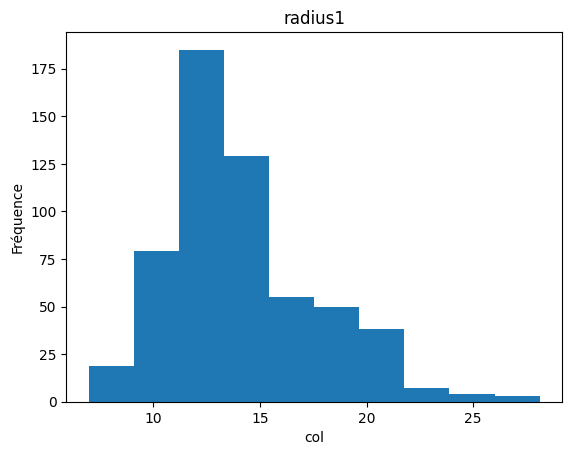


texture1
 count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture1, dtype: float64


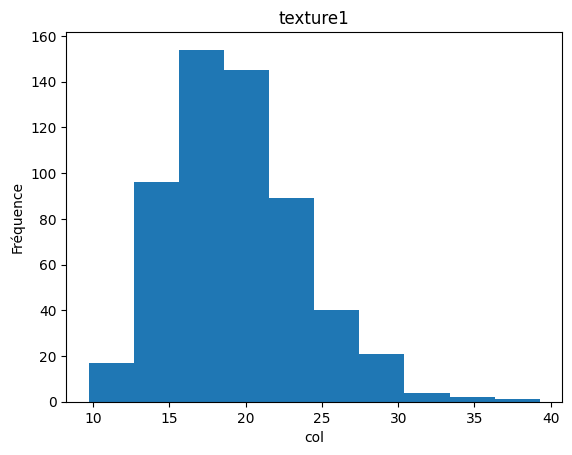


perimeter1
 count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter1, dtype: float64


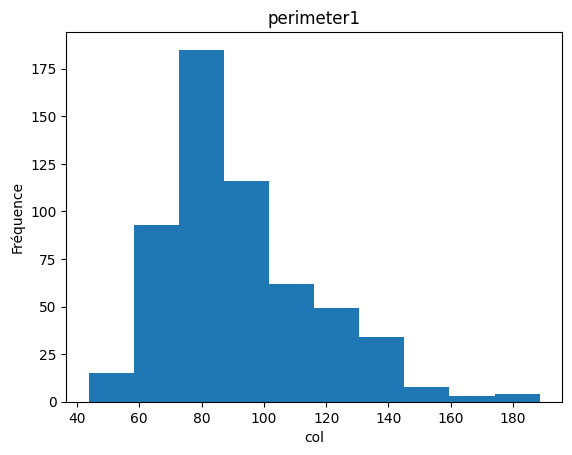


area1
 count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area1, dtype: float64


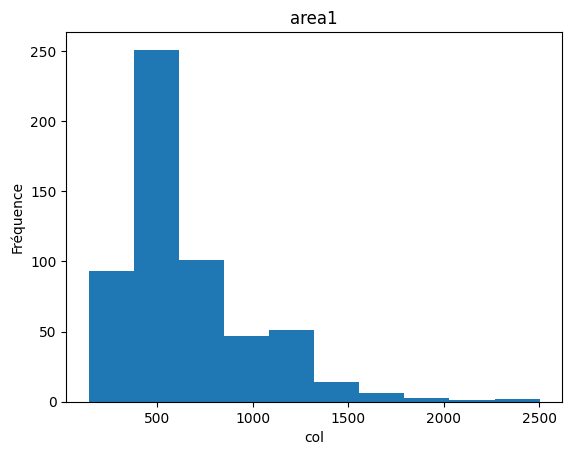


smoothness1
 count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: smoothness1, dtype: float64


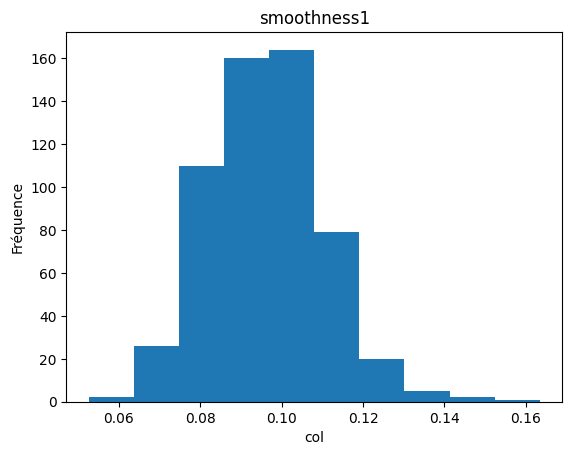


compactness1
 count    569.000000
mean       0.104341
std        0.052813
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.345400
Name: compactness1, dtype: float64


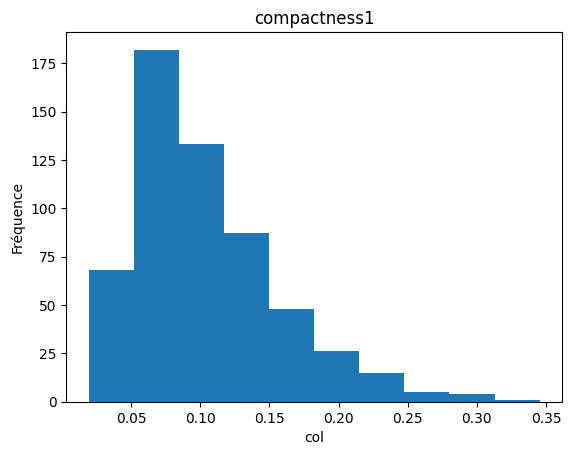


concavity1
 count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity1, dtype: float64


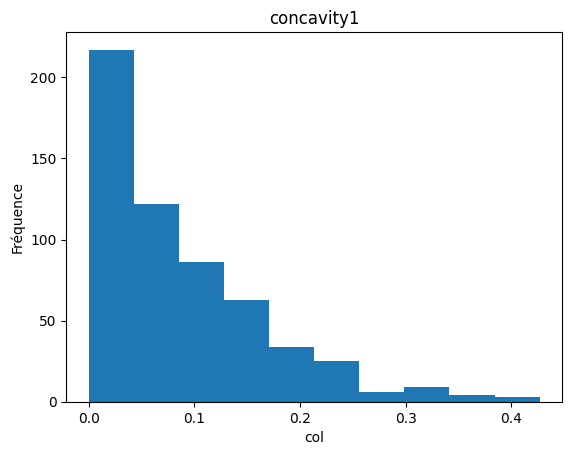


concave_points1
 count    569.000000
mean       0.048919
std        0.038803
min        0.000000
25%        0.020310
50%        0.033500
75%        0.074000
max        0.201200
Name: concave_points1, dtype: float64


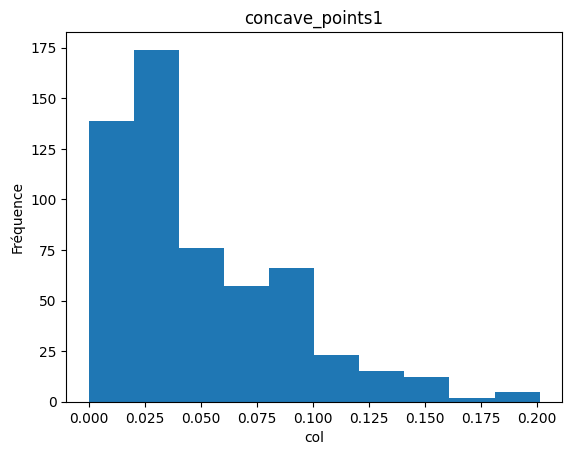


symmetry1
 count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: symmetry1, dtype: float64


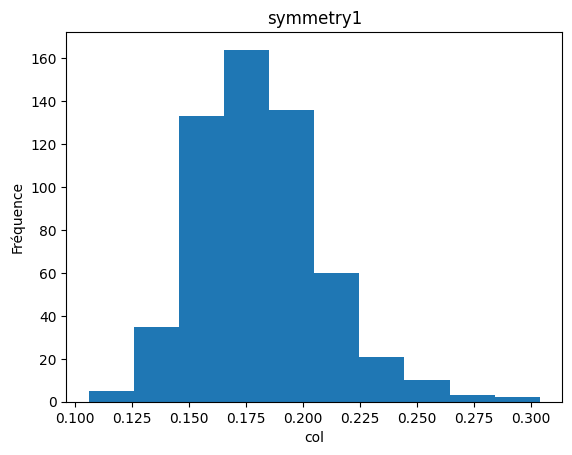


fractal_dimension1
 count    569.000000
mean       0.062798
std        0.007060
min        0.049960
25%        0.057700
50%        0.061540
75%        0.066120
max        0.097440
Name: fractal_dimension1, dtype: float64


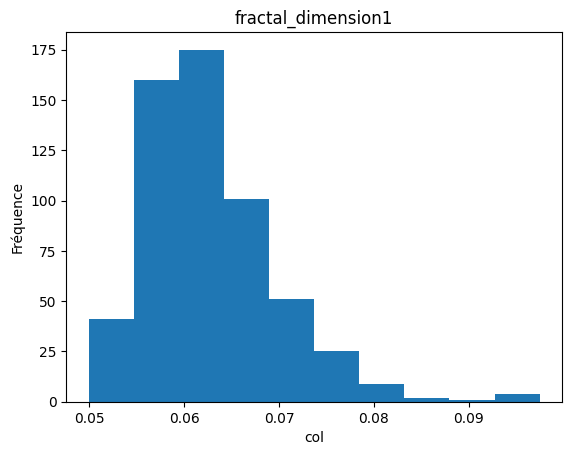


radius2
 count    569.000000
mean       0.405172
std        0.277313
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        2.873000
Name: radius2, dtype: float64


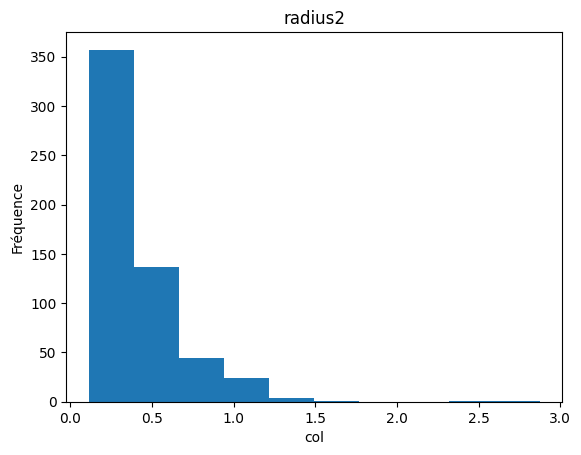


texture2
 count    569.000000
mean       1.216853
std        0.551648
min        0.360200
25%        0.833900
50%        1.108000
75%        1.474000
max        4.885000
Name: texture2, dtype: float64


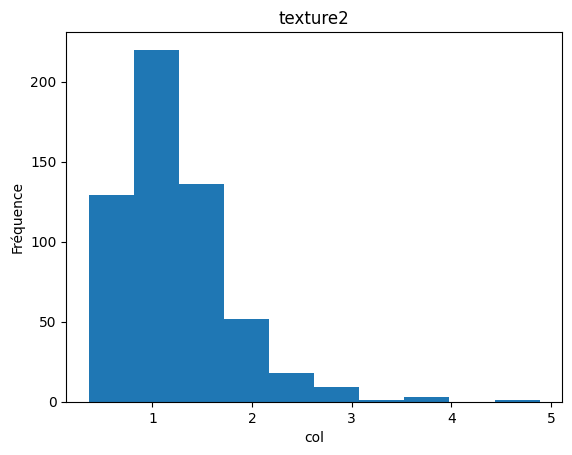


perimeter2
 count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Name: perimeter2, dtype: float64


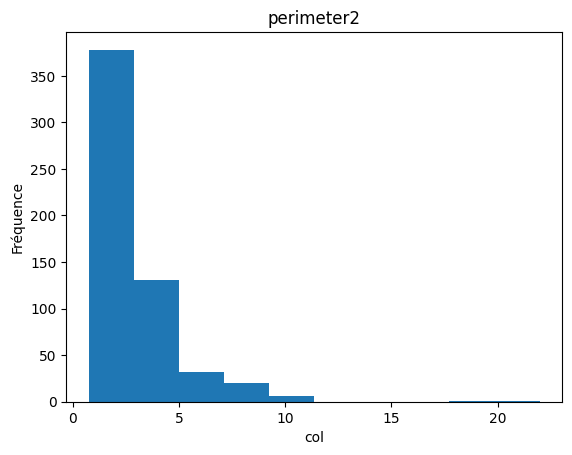


area2
 count    569.000000
mean      40.337079
std       45.491006
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max      542.200000
Name: area2, dtype: float64


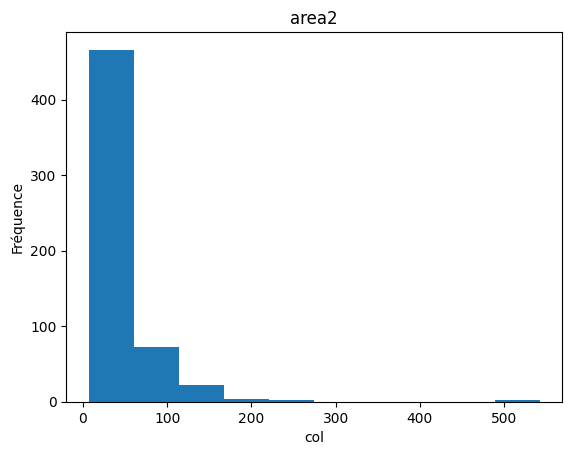


smoothness2
 count    569.000000
mean       0.007041
std        0.003003
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.031130
Name: smoothness2, dtype: float64


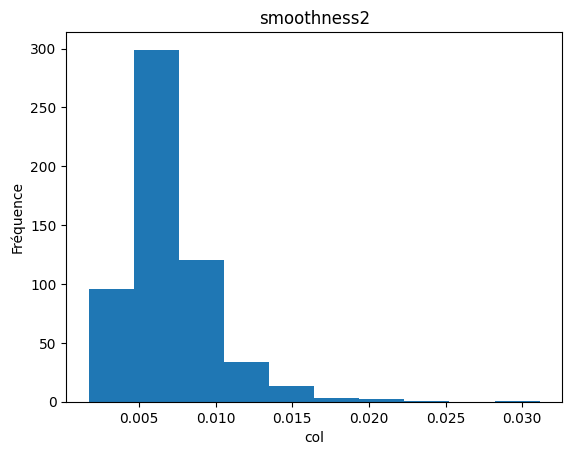


compactness2
 count    569.000000
mean       0.025478
std        0.017908
min        0.002252
25%        0.013080
50%        0.020450
75%        0.032450
max        0.135400
Name: compactness2, dtype: float64


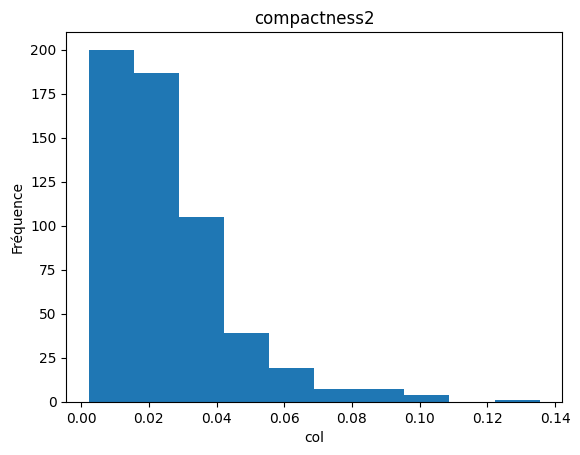


concavity2
 count    569.000000
mean       0.031894
std        0.030186
min        0.000000
25%        0.015090
50%        0.025890
75%        0.042050
max        0.396000
Name: concavity2, dtype: float64


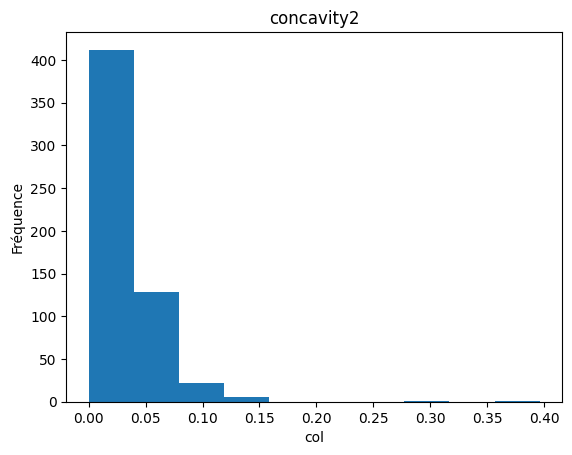


concave_points2
 count    569.000000
mean       0.011796
std        0.006170
min        0.000000
25%        0.007638
50%        0.010930
75%        0.014710
max        0.052790
Name: concave_points2, dtype: float64


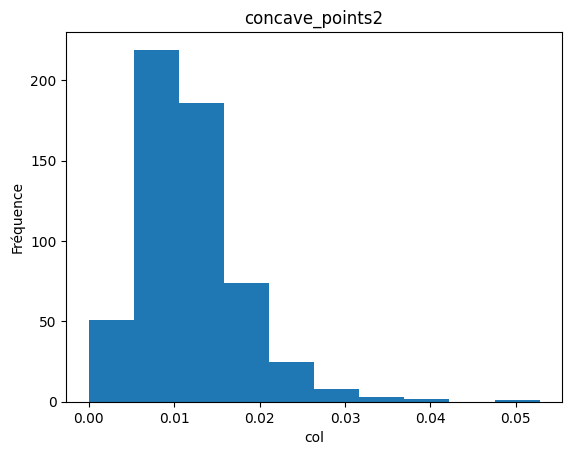


symmetry2
 count    569.000000
mean       0.020542
std        0.008266
min        0.007882
25%        0.015160
50%        0.018730
75%        0.023480
max        0.078950
Name: symmetry2, dtype: float64


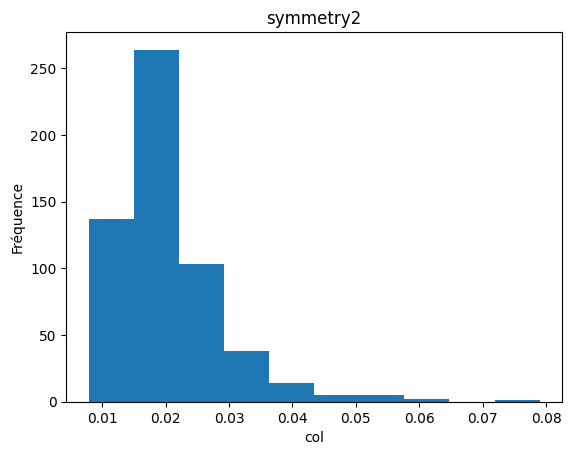


fractal_dimension2
 count    569.000000
mean       0.003795
std        0.002646
min        0.000895
25%        0.002248
50%        0.003187
75%        0.004558
max        0.029840
Name: fractal_dimension2, dtype: float64


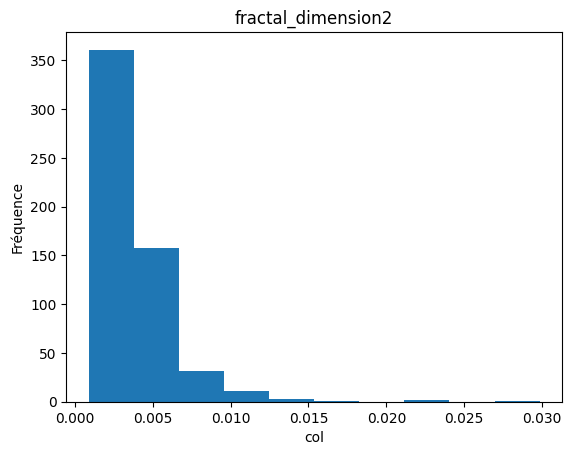


radius3
 count    569.000000
mean      16.269190
std        4.833242
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       36.040000
Name: radius3, dtype: float64


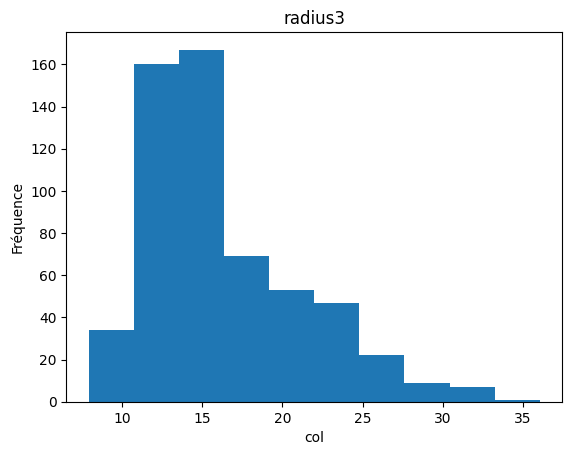


texture3
 count    569.000000
mean      25.677223
std        6.146258
min       12.020000
25%       21.080000
50%       25.410000
75%       29.720000
max       49.540000
Name: texture3, dtype: float64


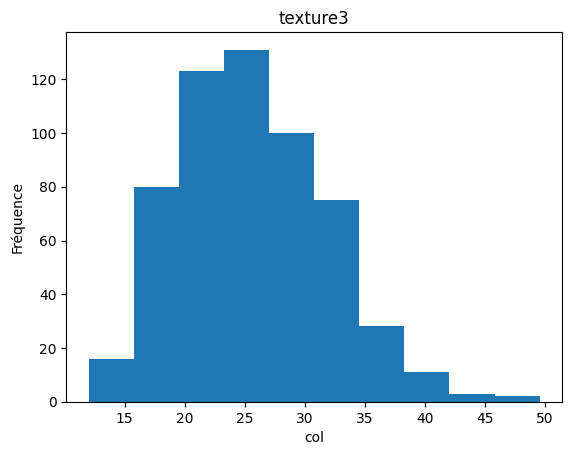


perimeter3
 count    569.000000
mean     107.261213
std       33.602542
min       50.410000
25%       84.110000
50%       97.660000
75%      125.400000
max      251.200000
Name: perimeter3, dtype: float64


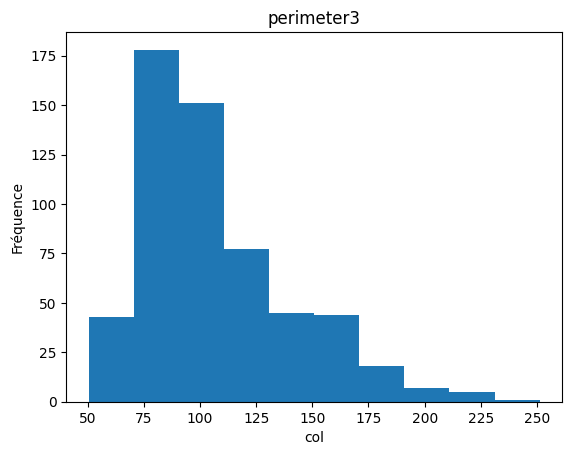


area3
 count     569.000000
mean      880.583128
std       569.356993
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      4254.000000
Name: area3, dtype: float64


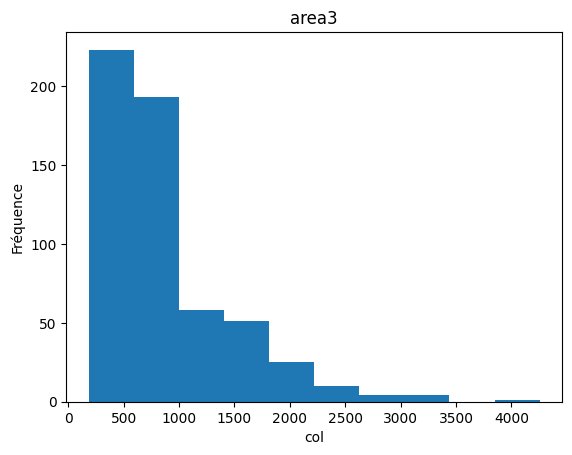


smoothness3
 count    569.000000
mean       0.132369
std        0.022832
min        0.071170
25%        0.116600
50%        0.131300
75%        0.146000
max        0.222600
Name: smoothness3, dtype: float64


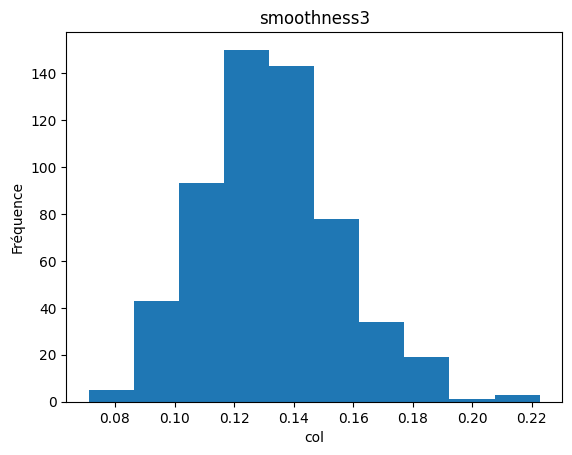


compactness3
 count    569.000000
mean       0.254265
std        0.157336
min        0.027290
25%        0.147200
50%        0.211900
75%        0.339100
max        1.058000
Name: compactness3, dtype: float64


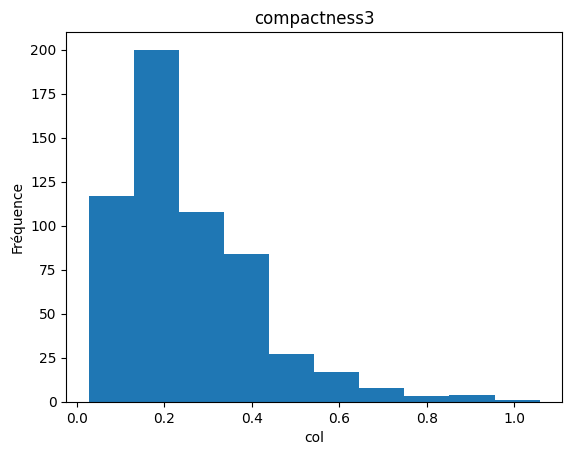


concavity3
 count    569.000000
mean       0.272188
std        0.208624
min        0.000000
25%        0.114500
50%        0.226700
75%        0.382900
max        1.252000
Name: concavity3, dtype: float64


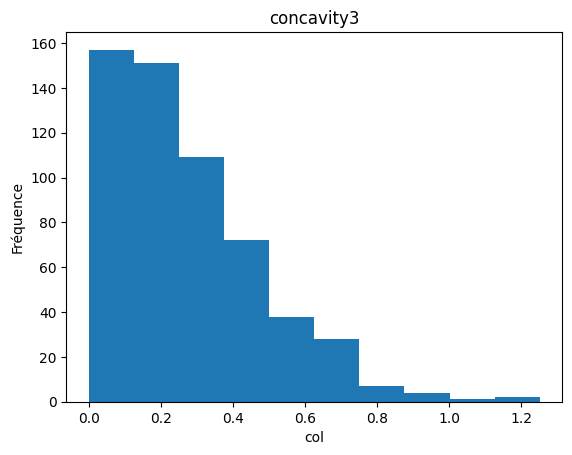


concave_points3
 count    569.000000
mean       0.114606
std        0.065732
min        0.000000
25%        0.064930
50%        0.099930
75%        0.161400
max        0.291000
Name: concave_points3, dtype: float64


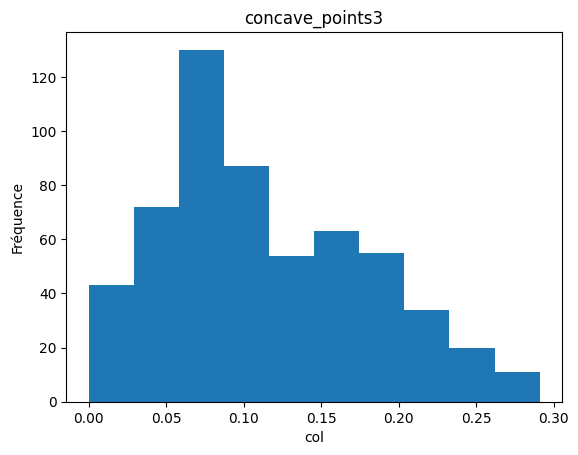


symmetry3
 count    569.000000
mean       0.290076
std        0.061867
min        0.156500
25%        0.250400
50%        0.282200
75%        0.317900
max        0.663800
Name: symmetry3, dtype: float64


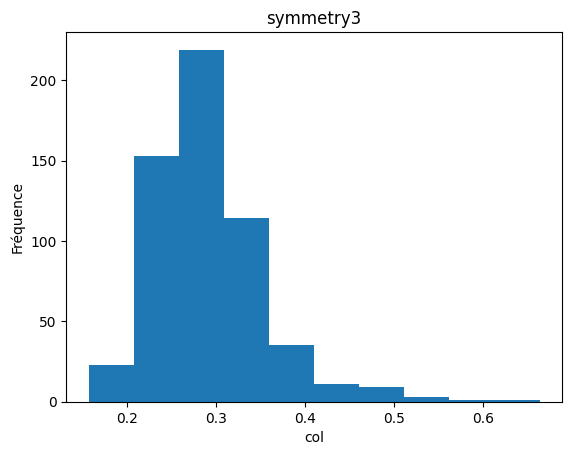


fractal_dimension3
 count    569.000000
mean       0.083946
std        0.018061
min        0.055040
25%        0.071460
50%        0.080040
75%        0.092080
max        0.207500
Name: fractal_dimension3, dtype: float64


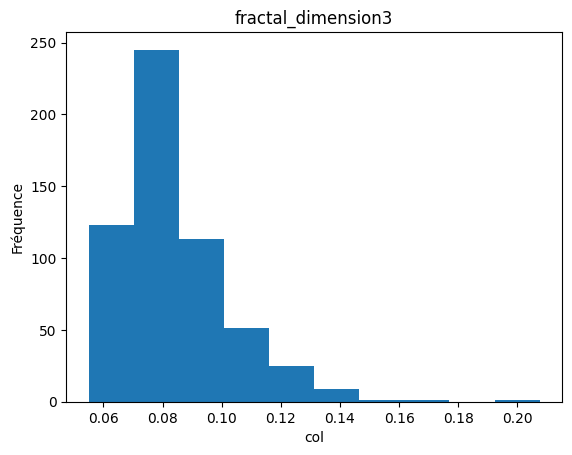

<Axes: >

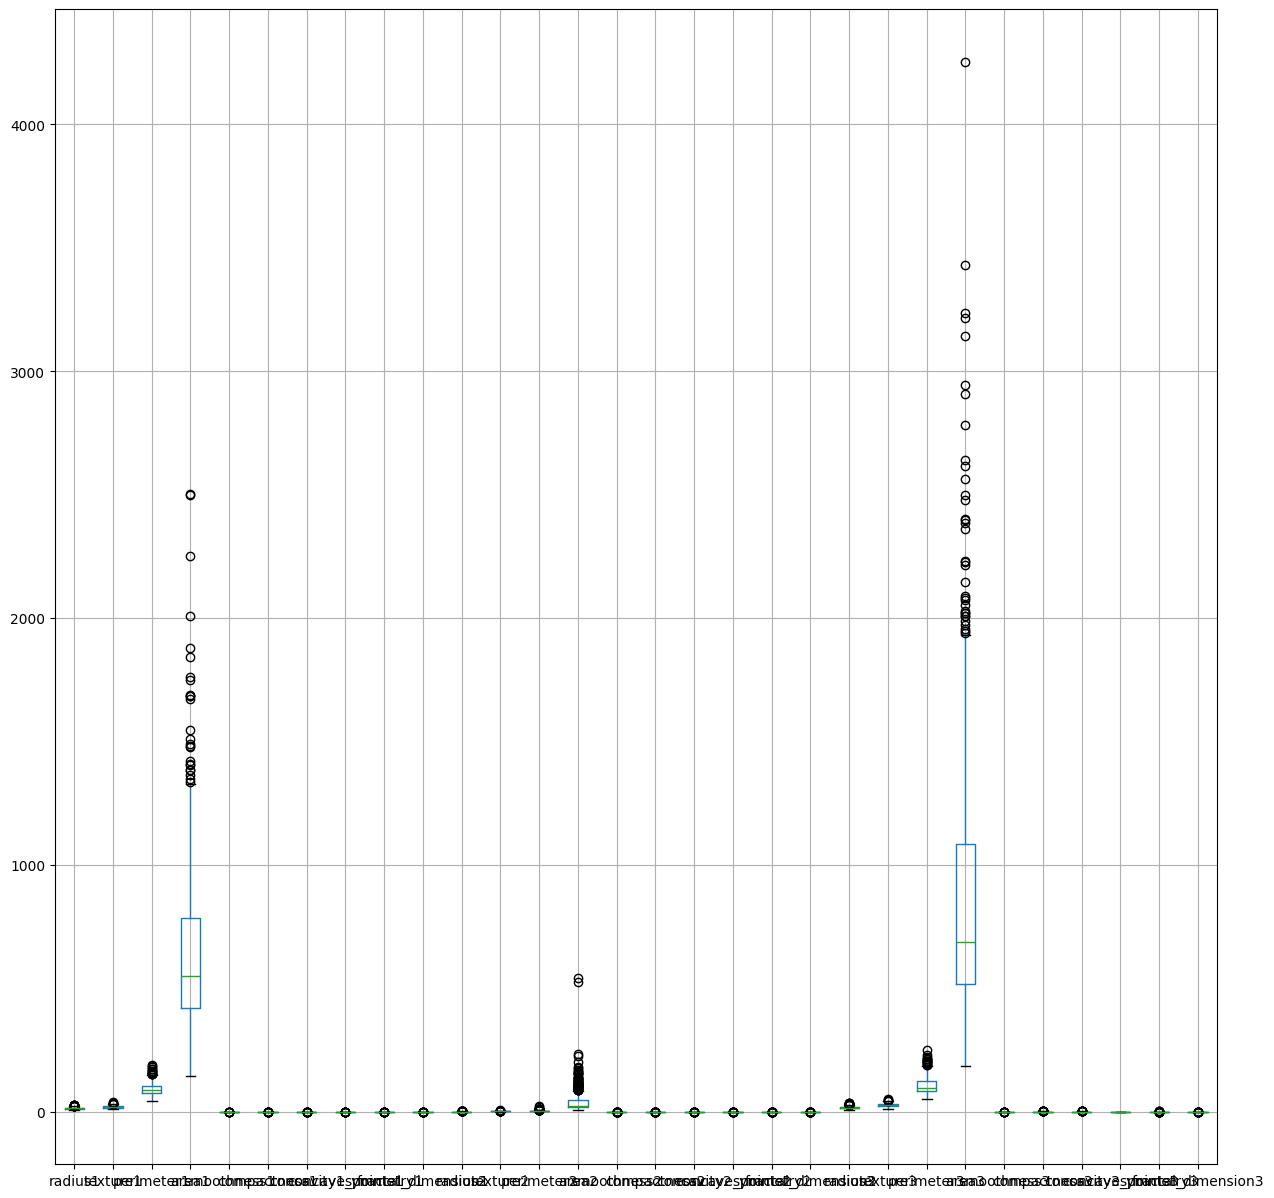

In [10]:
import matplotlib.pyplot as plt

for col in X.columns:
    print(col)
    print(f" {X[col].describe()}")

    plt.hist(X[col]) #Pour l'analyse de la distribution des données.
    plt.title(col)
    plt.xlabel('col')
    plt.ylabel('Fréquence')

    plt.show()


    print("")

X.boxplot(figsize=(15,15)) #Pour l'analyse de la dispersion des données.



In [11]:
df.isna().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

Vu la complexité de lecture du graphique complet du boxplot, nous allons faire une séparation et cibler les colomns 'area1','area2','area3', car en se basant sur l'histogramme, le describe et le boxplot général, elles présentent beaucoup de valeurs abérantes. 

In [12]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

area1
 count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area1, dtype: float64


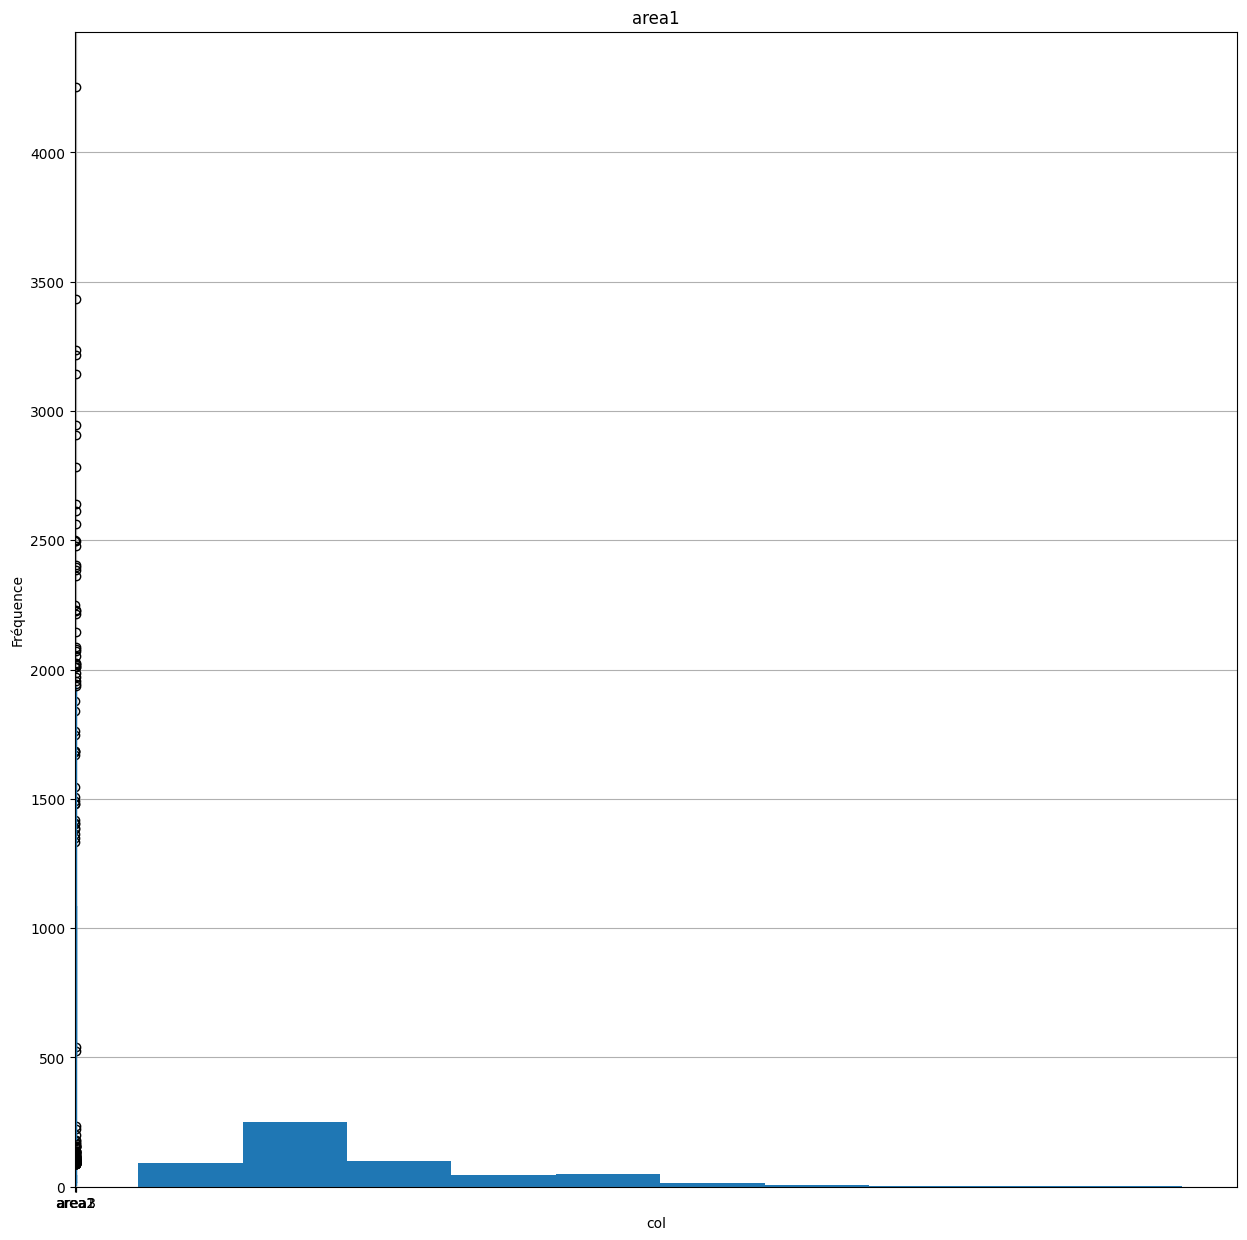


area2
 count    569.000000
mean      40.337079
std       45.491006
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max      542.200000
Name: area2, dtype: float64


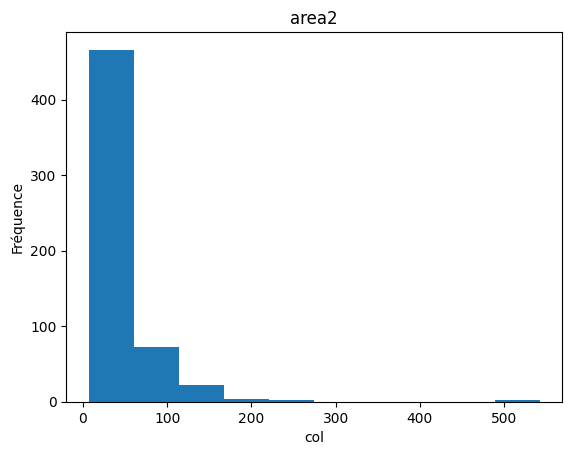


area3
 count     569.000000
mean      880.583128
std       569.356993
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      4254.000000
Name: area3, dtype: float64


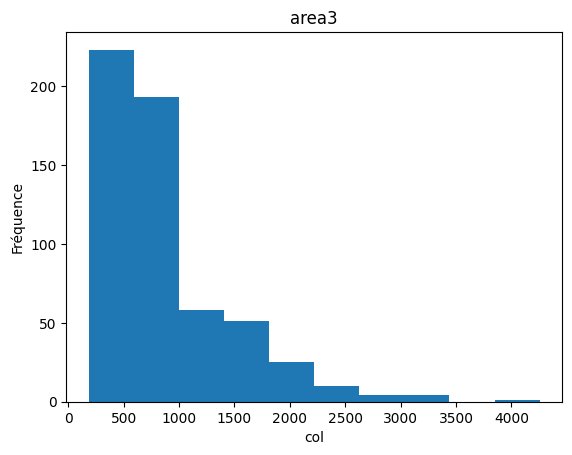

<Axes: >

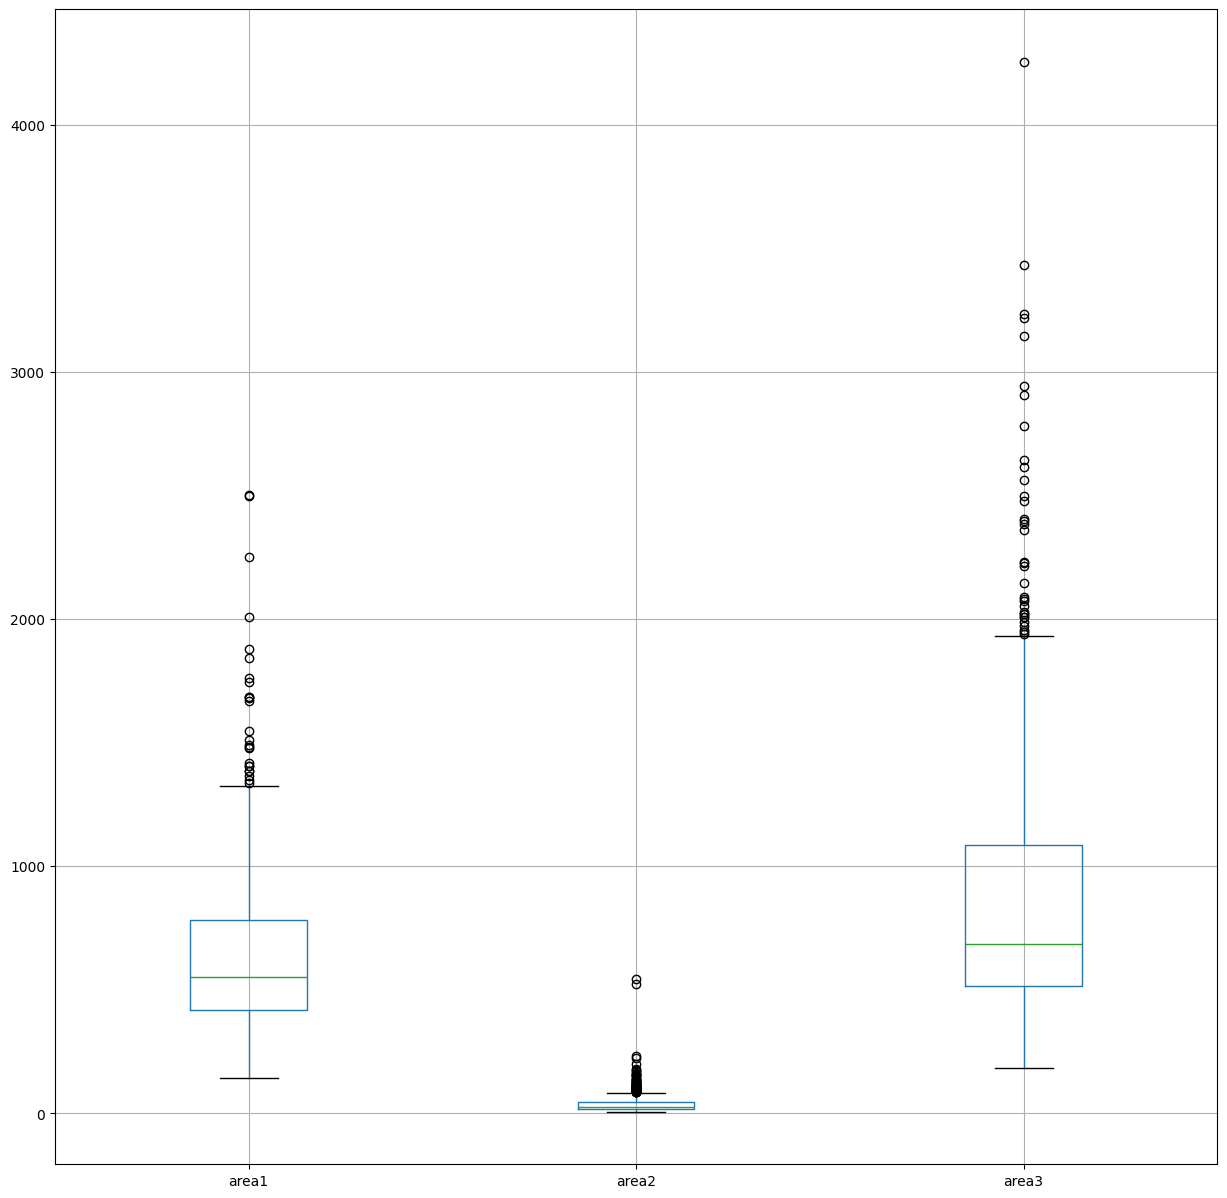

In [13]:
import matplotlib.pyplot as plt

X=X[['area1','area2','area3']]

X[['area1','area2','area3']].boxplot(figsize=(15,15)) #Pour l'analyse de la dispersion des données.

import matplotlib.pyplot as plt

for col in X.columns:
    print(col)
    print(f" {X[col].describe()}")

    plt.hist(X[col]) #Pour l'analyse de la distribution des données.
    plt.title(col)
    plt.xlabel('col')
    plt.ylabel('Fréquence')

    plt.show()


    print("")

X.boxplot(figsize=(15,15)) #Pour l'analyse de la dispersion des données.

area1 (area 1) : Surface moyenne des noyaux cellulaires

La boîte est large, ce qui montre une forte variabilité entre les échantillons.

La médiane est autour de 600–700, ce qui correspond à la surface moyenne typique d’un noyau.

Les valeurs extrêmes (outliers) vont au-delà de 2000, voire 4000.
Ces valeurs très élevées représentent des cellules anormalement grandes,
souvent associées à des tumeurs malignes.

Interprétation : cette variable est dispersée et asymétrique, dominée par quelques cas extrêmes.



area2 (area_se) : Erreur standard / variation locale de la surface

La boîte est très aplatie, centrée sur des valeurs proches de 0 à 50.

Cela signifie que la plupart des cellules ont une surface très stable,
avec peu de fluctuations d’un échantillon à l’autre.

Quelques outliers sont visibles, mais ils restent rares et faibles.

Interprétation : area_se est une variable faiblement dispersée,
et ne présente que peu d’extrêmes. Elle n’a pas besoin d’un traitement lourd.



area3 (area_worst) :  Surface maximale observée dans l’image

La médiane est plus élevée (autour de 900–1000) que celle de area 1.

La dispersion est importante, et de nombreux outliers s’étendent au-delà de 3000–4000.

Cela reflète la présence de cellules anormalement grandes dans certains cas,
typiques des tumeurs malignes très développées.

Interprétation : area_worst amplifie la tendance observée dans area_mean,
en mettant encore plus en évidence les cas extrêmes.


Nous devons faire  attention dans le traitement de ces données car elles véhicules des informations importantes.



Les outliers dans les variables comme area 1 ou area_worst ne sont pas forcément des erreurs de mesure.
Ils peuvent traduire :

des cellules réellement très grandes,

typiques des tumeurs malignes,

donc très informatives pour le modèle.

Autrement dit, ce ne sont pas des anomalies à corriger (obligatoirement), mais des signaux biologiques importants.

###  Etude de l'étiquette

In [14]:
df['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [15]:
df['Diagnosis'].isna().sum()

np.int64(0)

<Axes: >

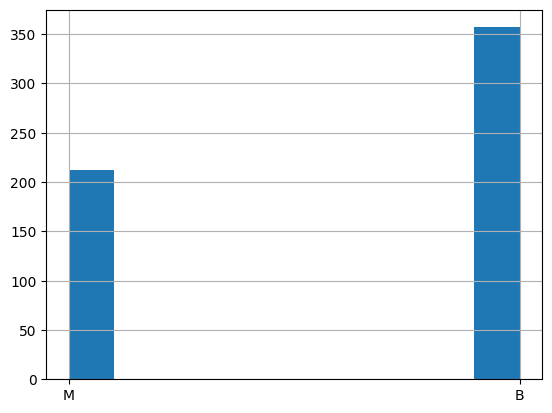

In [16]:
df['Diagnosis'].hist()

On remarque que notre jeu de données est  imbalancé. Ce qui est une réalité pour les dataframes liées à la détection des annomalies. En effet il y a plus de cas bénins que de malades

  Donc l'usage des méthodes d'équilibrage( stratification , suréchantillonnage, souséchantillonnage) pourra être prise en compte  ainsi que l'évaluation des modèles avec des métriques appropriées.



##  II. Prétraitement des données

###  Données manquantes

In [17]:
df.isna().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

Pas de données manquantes


#### gestion des données catégorielles

In [18]:
df.select_dtypes(include=['object','category']).columns

Index(['Diagnosis'], dtype='object')

Etant donné que la cible n'a pas beaucoup d'occurence , nous allons utiliser le map pour juste remplacer les occurences

In [19]:
# Encodage de la variable cible : M = 1, B = 0
y=df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Vérification rapide
print(df['Diagnosis'].value_counts())

Diagnosis
0    357
1    212
Name: count, dtype: int64
